In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/JohannaKSV/DeepLearning/main/train_data.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/JohannaKSV/DeepLearning/main/test_data.csv')

#df_train = pd.read_csv('/content/train_data.csv')
#df_test = pd.read_csv('/content/test_data.csv')


In [ ]:
df_train.head(5)

ID  Bankruptcy  Realized.Sales.Gross.Profit.Growth.Rate  \
0   1           0                                 0.087661   
1   2           0                                 0.021892   
2   3           0                                 0.102249   
3   4           0                                 0.029972   
4   6           0                                 0.021164   

   Operating.Expense.Rate  Operating.Profit.Per.Share..Yuan...  \
0            1.900349e-04                             0.131094   
1            5.371576e-04                             0.086167   
2            2.178329e-04                             0.157755   
3            4.915756e+10                             0.249279   
4            1.206001e-04                             0.239817   

   Gross.Profit.to.Sales  Tax.rate..A.  Current.Liability.to.Liability  \
0               0.583345      0.000000                        0.815892   
1               0.695478      0.209649                        0.768636   
2               0.766934      0.272061                        0.643316   
3               0.611580      0.288357                        0.752782   
4               0.614250      0.000000                        0.559498   

   Continuous.Net.Profit.Growth.Rate  Long.term.Liability.to.Current.Assets  \
0                           0.395719                               0.089276   
1                           0.163505                               0.000000   
2                           0.181571                               0.010180   
3                           0.409196                               0.018603   
4                           0.286989                               0.148687   

   ...  Per.Share.Net.profit.before.tax..Yuan...  \
0  ...                                  0.223720   
1  ...                                  0.324763   
2  ...                                  0.360892   
3  ...                                  0.152445   
4  ...                                  0.217282   

   Continuous.interest.rate..after.tax.  Liability.Assets.Flag  \
0                              0.801737                      0   
1                              0.791203                      0   
2                              0.803126                      0   
3                              0.824732                      0   
4                              0.787010                      0   

   Working.Capital.to.Total.Assets  Degree.of.Financial.Leverage..DFL.  \
0                         0.839112                            0.036551   
1                         0.908450                            0.126752   
2                         0.865943                            0.018152   
3                         0.806254                            0.051284   
4                         0.769843                            0.012872   

   Operating.Gross.Margin  Contingent.liabilities.Net.worth  \
0                0.591350                          0.007401   
1                0.766066                          0.020514   
2                0.687211                          0.004363   
3                0.715973                          0.014162   
4                0.704043                          0.003050   

   Operating.Profit.Growth.Rate  Cash.Flow.to.Liability  \
0                      0.913175                0.489822   
1                      0.849241                0.550247   
2                      0.865814                0.447168   
3                      0.843357                0.485163   
4                      0.884905                0.422001   

   Quick.Assets.Total.Assets  
0                   0.138714  
1                   0.704211  
2                   0.398086  
3                   0.617386  
4                   0.187121  

[5 rows x 65 columns]

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 65 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   ID                                                  2050 non-null   int64  
 1   Bankruptcy                                          2050 non-null   int64  
 2   Realized.Sales.Gross.Profit.Growth.Rate             2050 non-null   float64
 3   Operating.Expense.Rate                              2050 non-null   float64
 4   Operating.Profit.Per.Share..Yuan...                 2050 non-null   float64
 5   Gross.Profit.to.Sales                               2050 non-null   float64
 6   Tax.rate..A.                                        2050 non-null   float64
 7   Current.Liability.to.Liability                      2050 non-null   float64
 8   Continuous.Net.Profit.Growth.Rate                   2050 non-null   float64
 9

In [ ]:
# Identificar si hay valores NaN en las columnas
nan_count = df_train.isnull().sum()

# Mostrar el número de valores NaN por columna
print(nan_count)

# Si quieres ver si hay alguna columna con NaN
if nan_count.any() > 0:
    print("Existen valores NaN en el DataFrame.")
else:
    print("No hay valores NaN en el DataFrame.")

ID                                         0
Bankruptcy                                 0
Realized.Sales.Gross.Profit.Growth.Rate    0
Operating.Expense.Rate                     0
Operating.Profit.Per.Share..Yuan...        0
                                          ..
Operating.Gross.Margin                     0
Contingent.liabilities.Net.worth           0
Operating.Profit.Growth.Rate               0
Cash.Flow.to.Liability                     0
Quick.Assets.Total.Assets                  0
Length: 65, dtype: int64
No hay valores NaN en el DataFrame.


# Exploración de los datos para su entendimiento dentro del contexto organizacional

In [ ]:
df_train = df_train.drop('ID', axis=1)
df_train.describe()

Bankruptcy  Realized.Sales.Gross.Profit.Growth.Rate  \
count  2050.000000                              2050.000000   
mean      0.030244                                 0.052426   
std       0.171300                                 0.037346   
min       0.000000                                 0.005576   
25%       0.000000                                 0.022660   
50%       0.000000                                 0.039844   
75%       0.000000                                 0.074134   
max       1.000000                                 0.197622   

       Operating.Expense.Rate  Operating.Profit.Per.Share..Yuan...  \
count            2.050000e+03                          2050.000000   
mean             1.143592e+10                             0.168423   
std              6.637064e+10                             0.074822   
min              1.816459e-05                             0.026690   
25%              3.866010e-04                             0.107202   
50%              2.890552e-03                             0.153541   
75%              2.040574e+06                             0.219785   
max              8.153957e+11                             0.402487   

       Gross.Profit.to.Sales  Tax.rate..A.  Current.Liability.to.Liability  \
count            2050.000000   2050.000000                     2050.000000   
mean                0.660301      0.149762                        0.793474   
std                 0.065176      0.167852                        0.185160   
min                 0.485416      0.000000                        0.019372   
25%                 0.609787      0.000000                        0.679179   
50%                 0.655394      0.107021                        0.844793   
75%                 0.713574      0.258826                        0.948177   
max                 0.803413      0.966891                        1.000000   

       Continuous.Net.Profit.Growth.Rate  \
count                        2050.000000   
mean                            0.289170   
std                             0.086326   
min                             0.128763   
25%                             0.219818   
50%                             0.275462   
75%                             0.353458   
max                             1.000000   

       Long.term.Liability.to.Current.Assets  Total.assets.to.GNP.price  ...  \
count                           2.050000e+03               2.050000e+03  ...   
mean                            9.294008e+07               1.131508e+06  ...   
std                             1.985623e+09               3.534875e+07  ...   
min                             0.000000e+00               2.043140e-05  ...   
25%                             0.000000e+00               1.941380e-03  ...   
50%                             3.566712e-03               6.752853e-03  ...   
75%                             2.293107e-02               2.145355e-02  ...   
max                             6.747688e+10               1.172719e+09  ...   

       Per.Share.Net.profit.before.tax..Yuan...  \
count                               2050.000000   
mean                                   0.253212   
std                                    0.089347   
min                                    0.011441   
25%                                    0.182113   
50%                                    0.238402   
75%                                    0.320693   
max                                    0.761559   

       Continuous.interest.rate..after.tax.  Liability.Assets.Flag  \
count                           2050.000000            2050.000000   
mean                               0.813889               0.000488   
std                                0.038671               0.022086   
min                                0.733181               0.000000   
25%                                0.783223               0.000000   
50%                                0.812021               0.000000   
75%                                0.8

In [ ]:
#sns.pairplot(df_train, kind="scatter")
#plt.show()

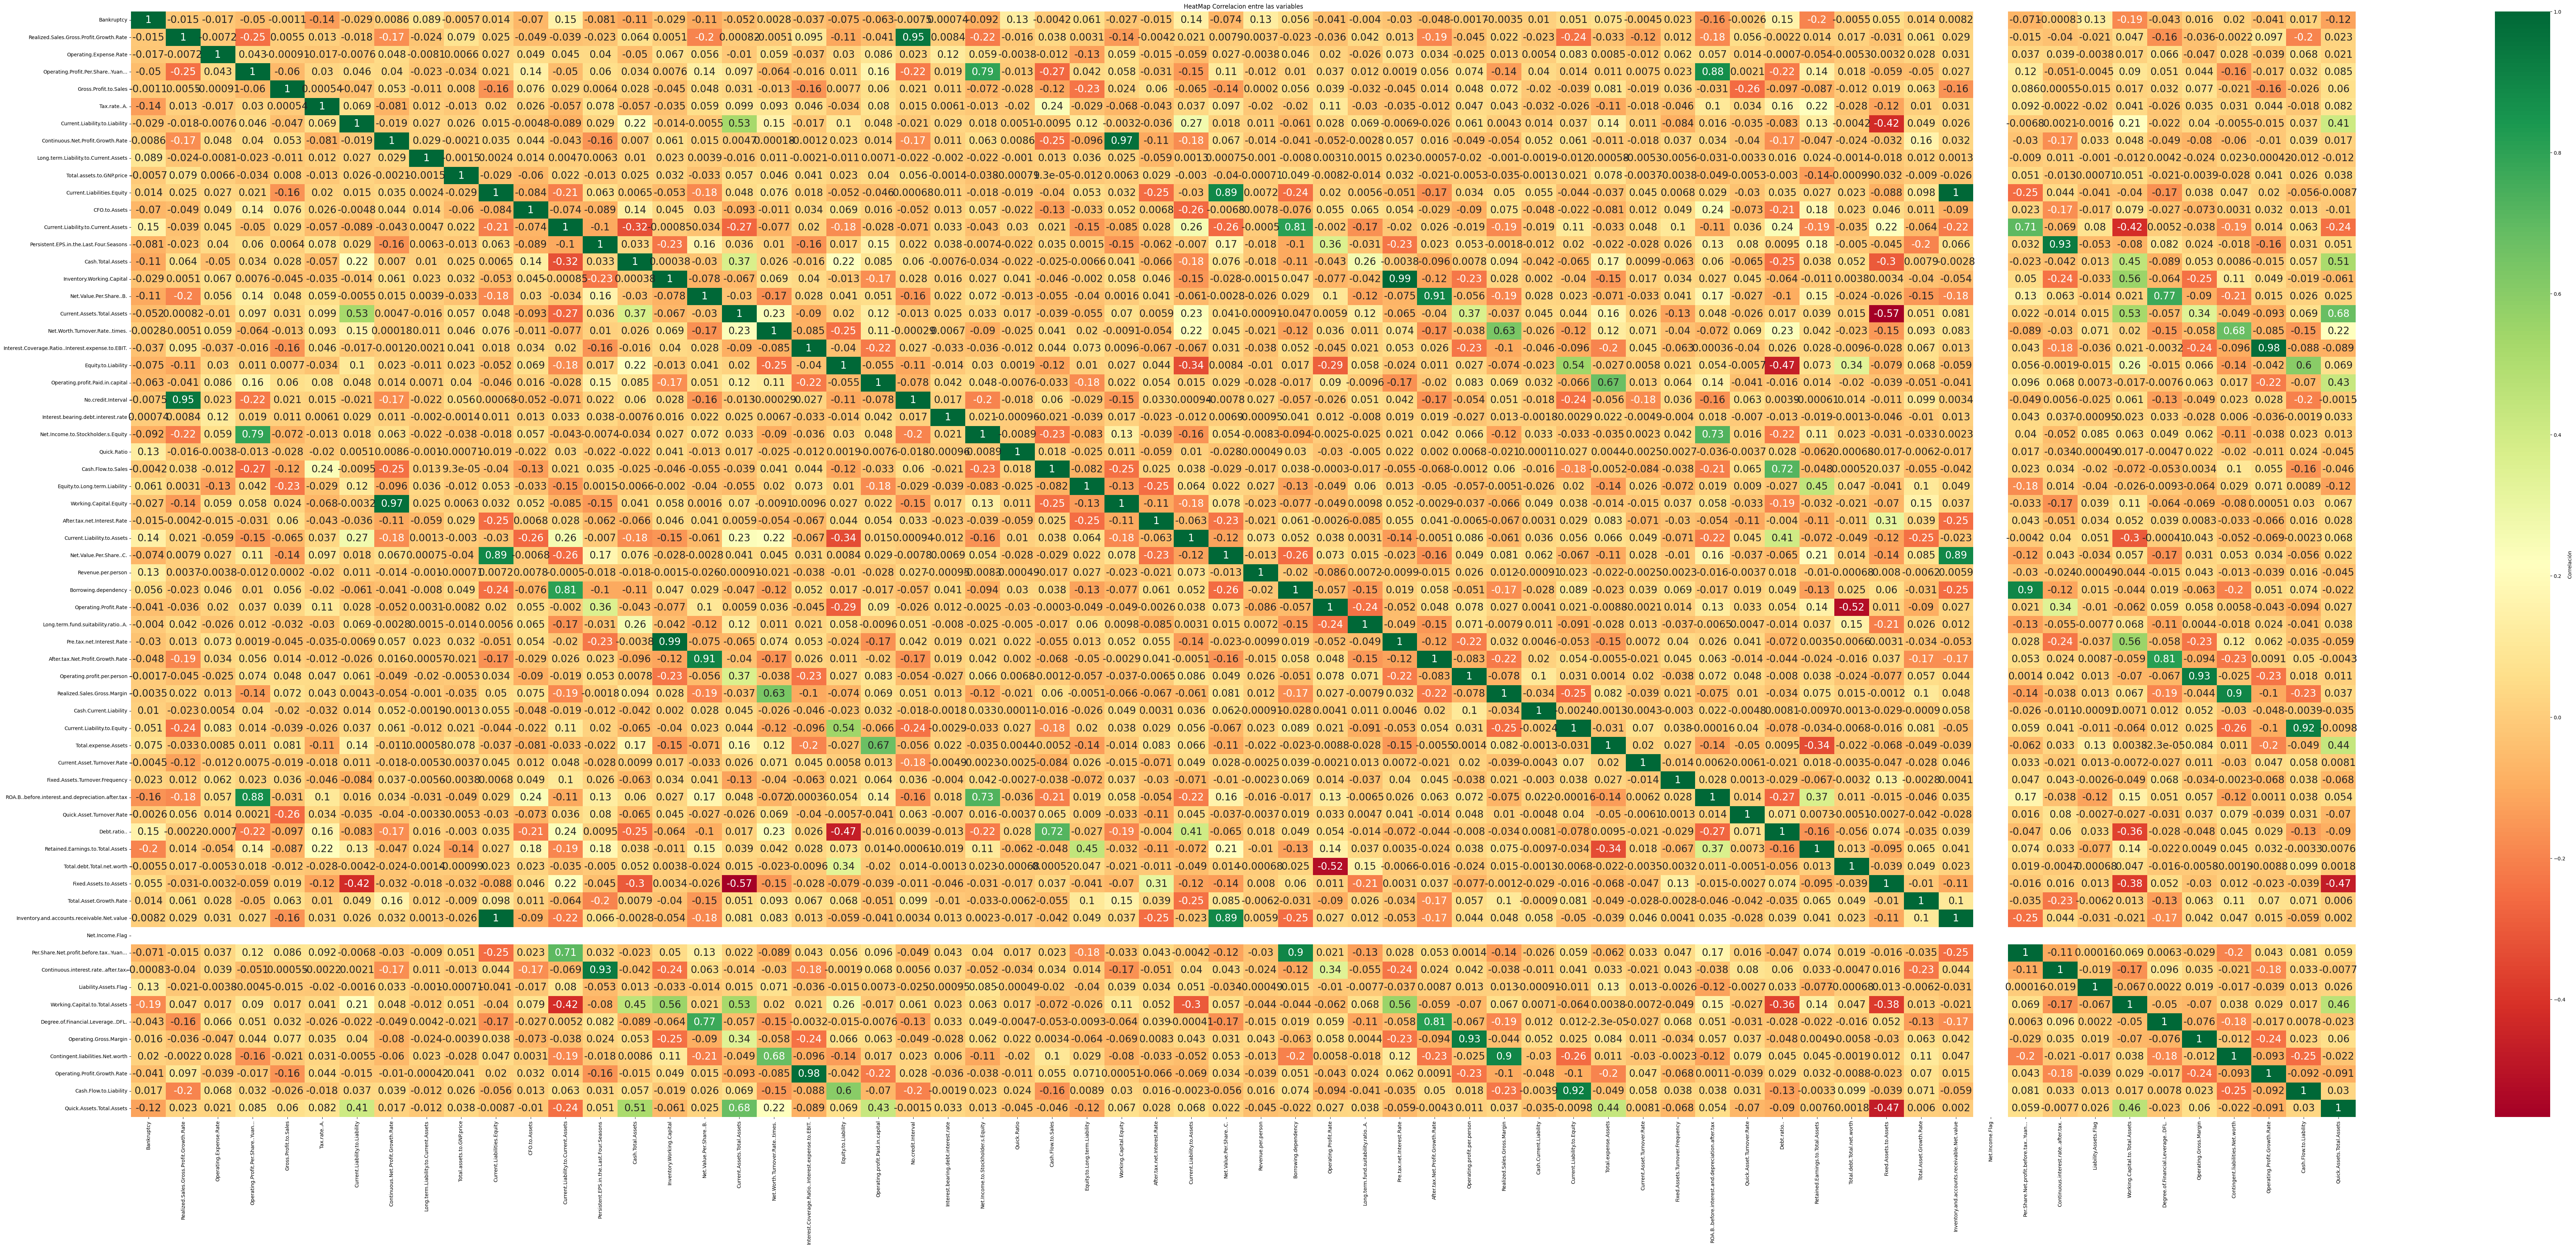

In [ ]:
plt.figure(figsize=(100,40))
sns.heatmap(df_train.corr(method='pearson'),annot=True,cmap='RdYlGn',cbar_kws={'label':'Correlación'},annot_kws={'size': 20})
plt.title('HeatMap Correlacion entre las variables')
plt.show()

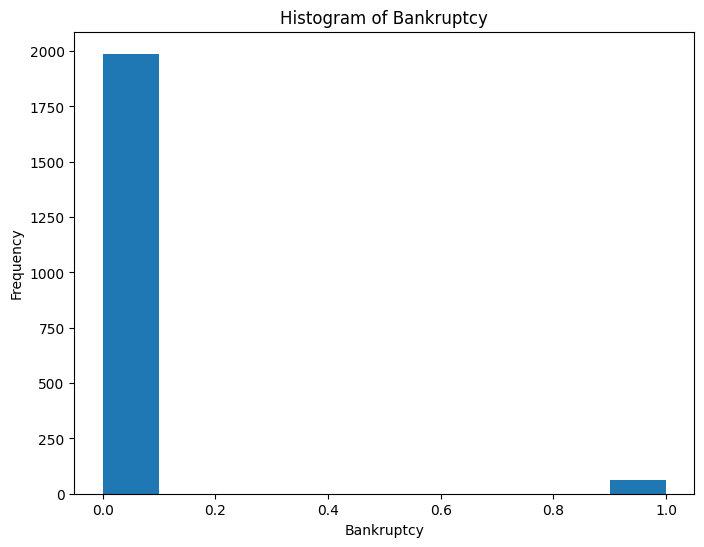

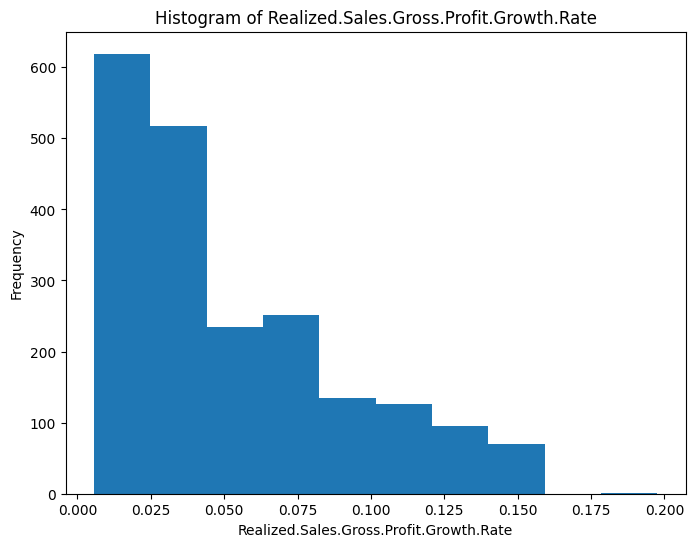

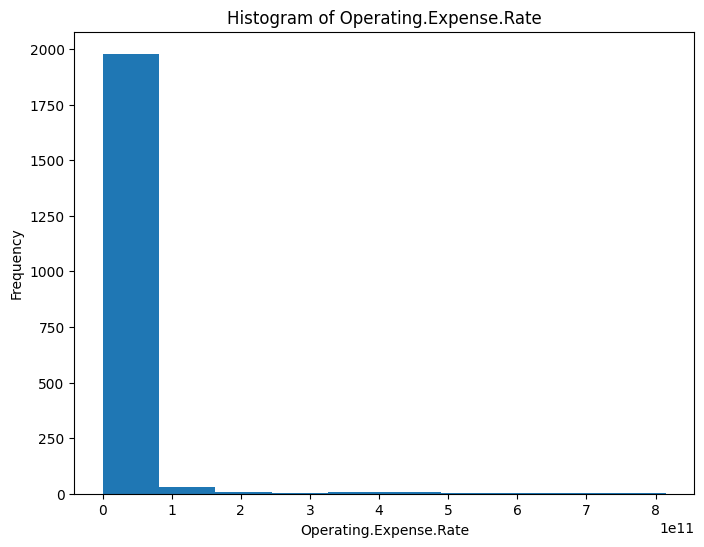

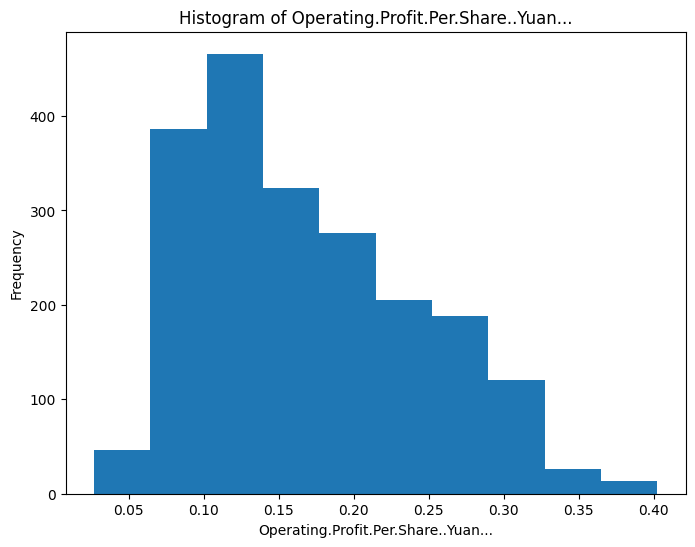

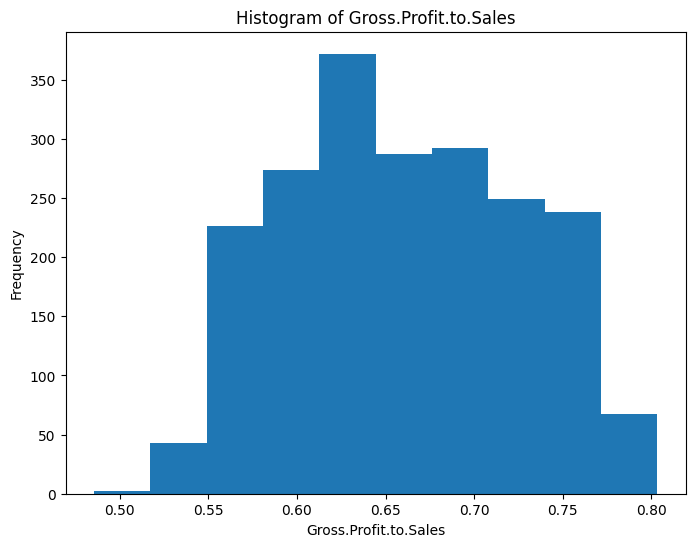

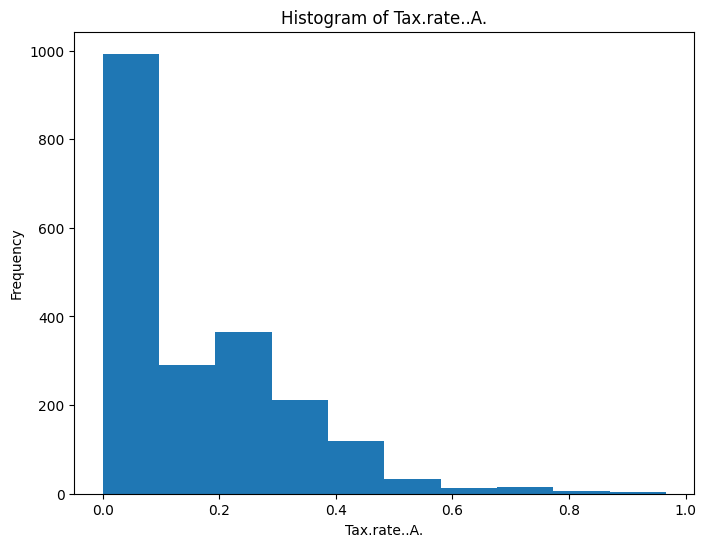

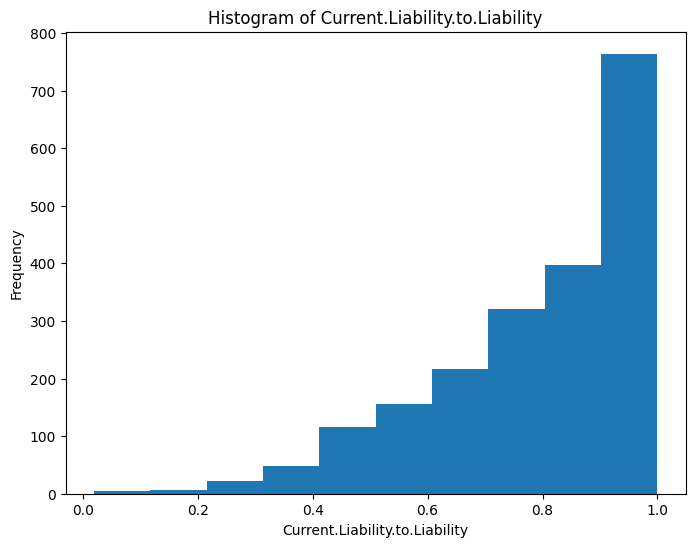

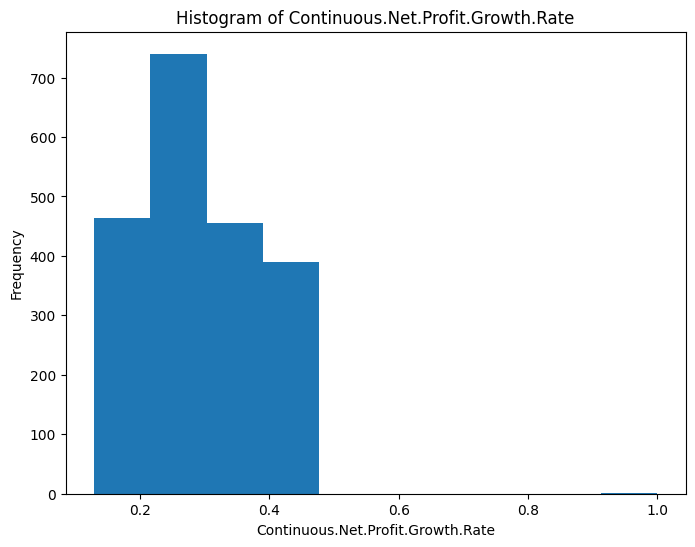

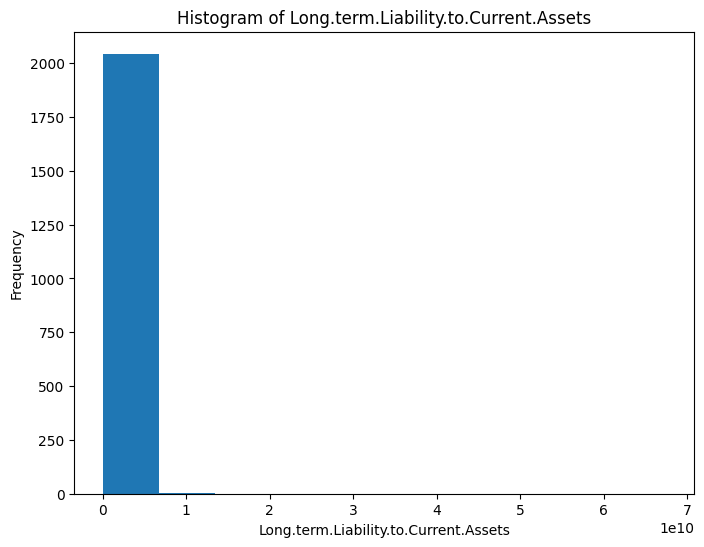

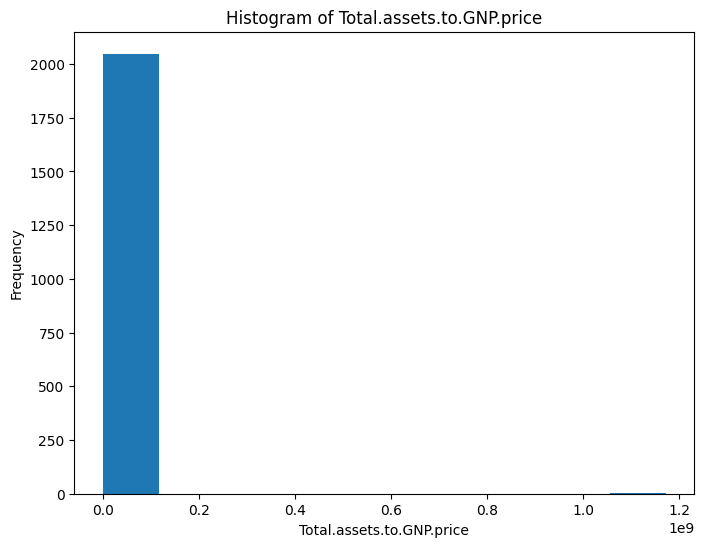

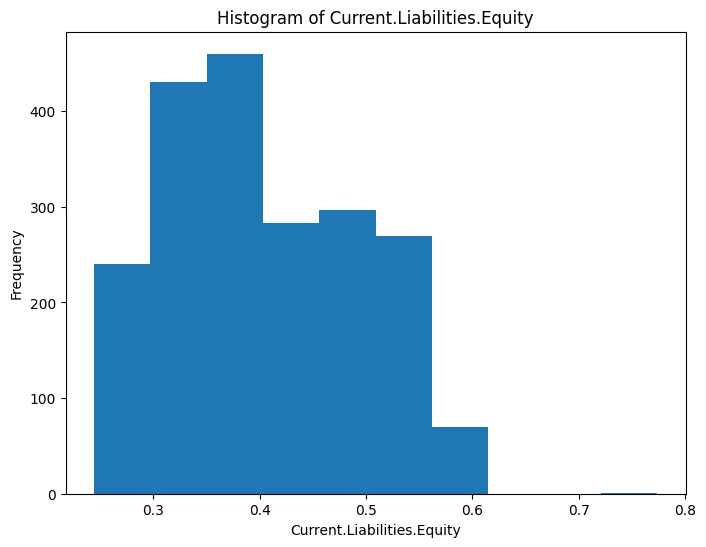

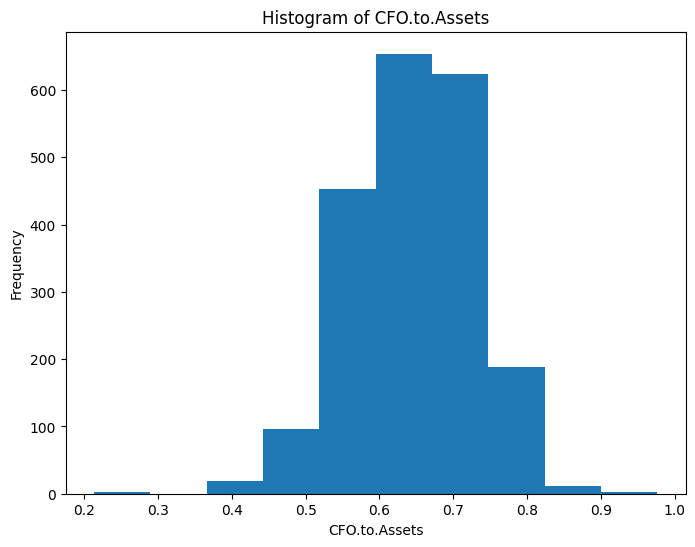

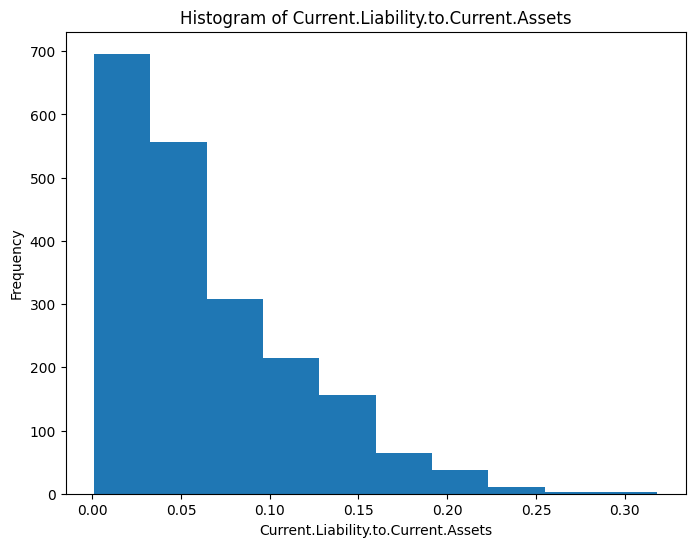

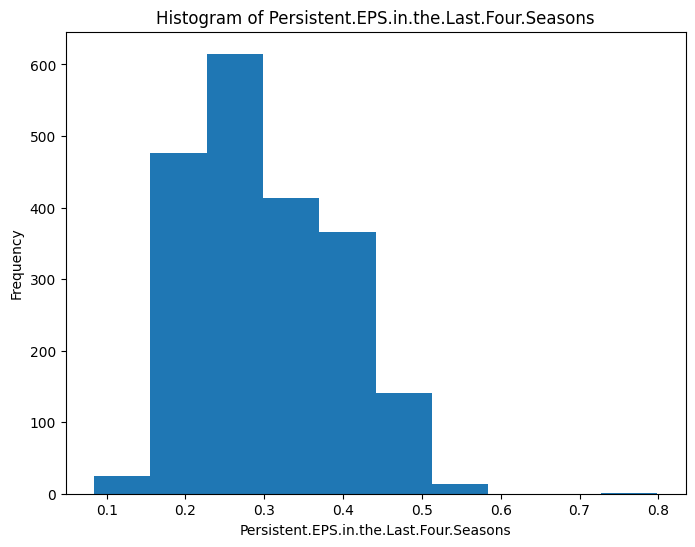

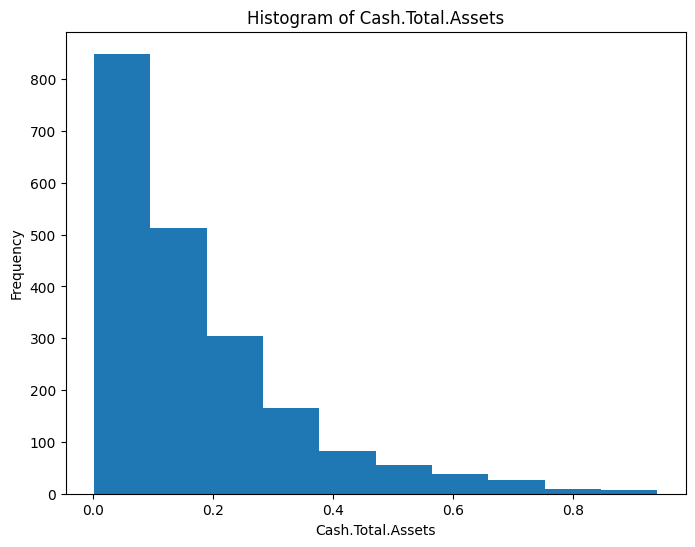

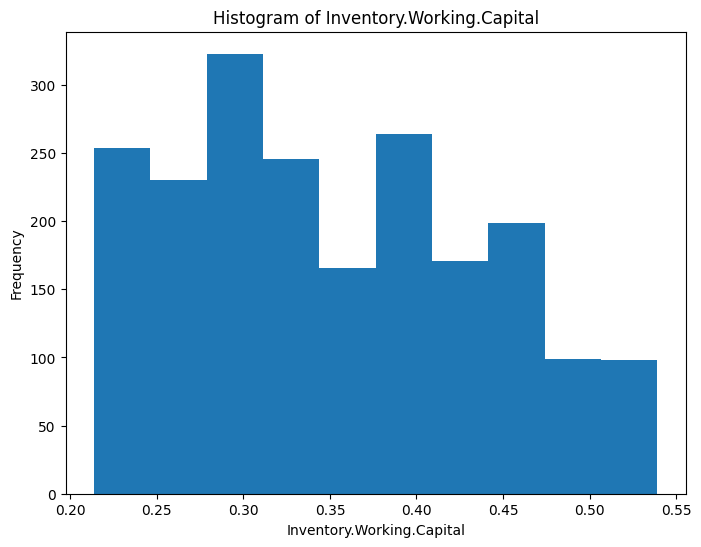

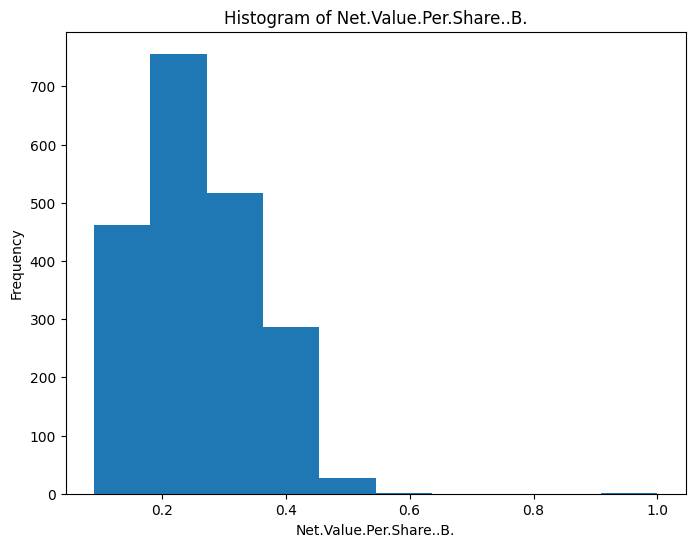

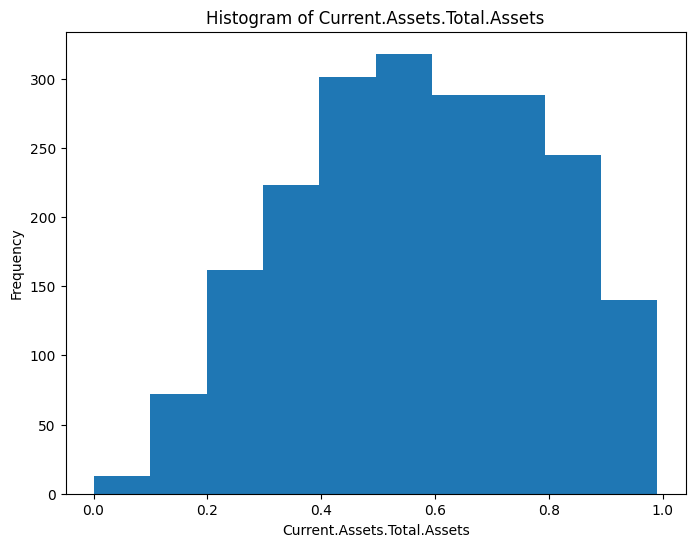

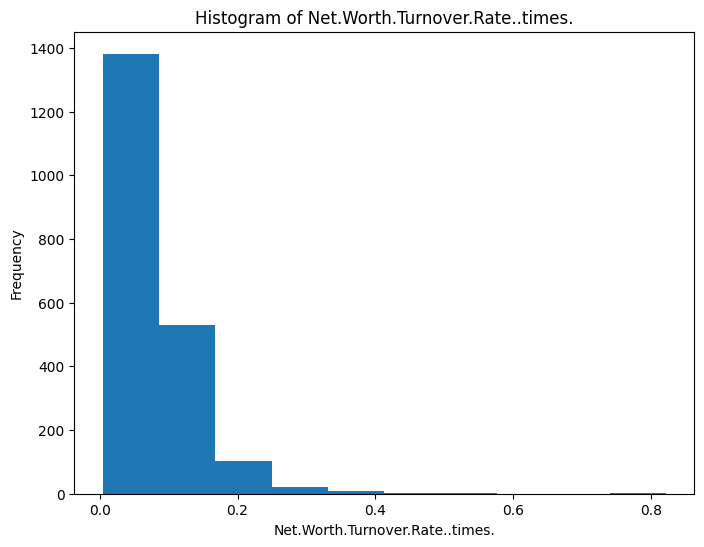

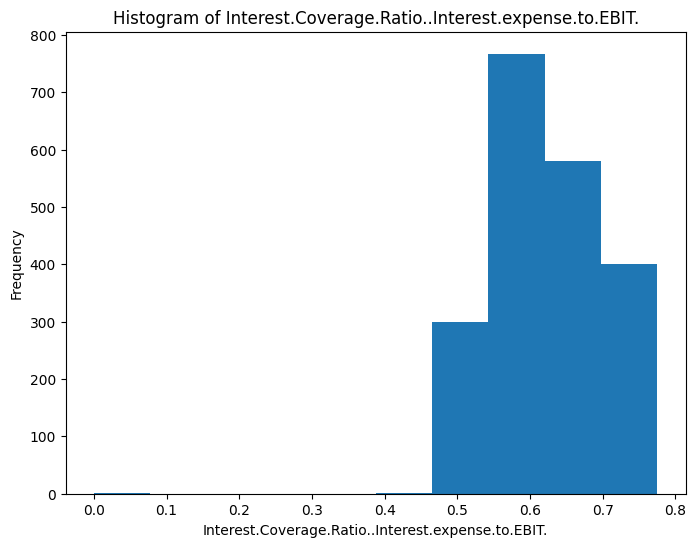

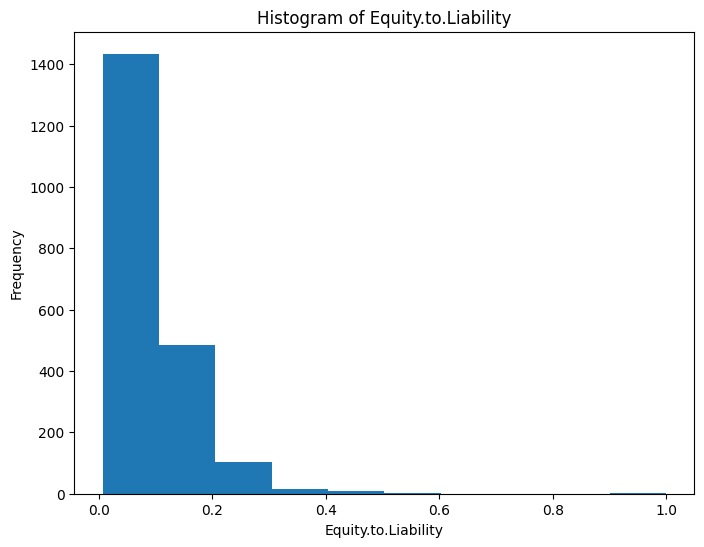

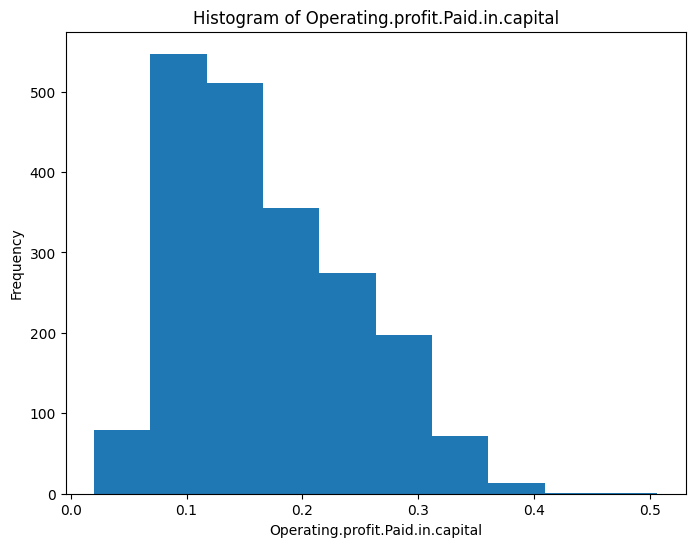

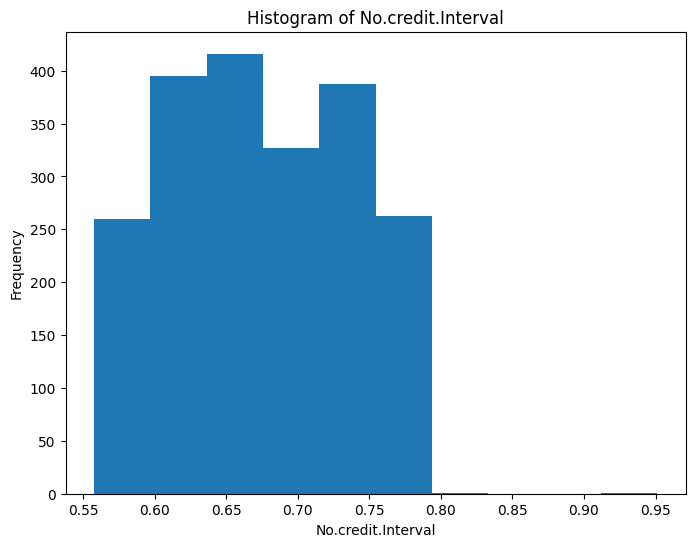

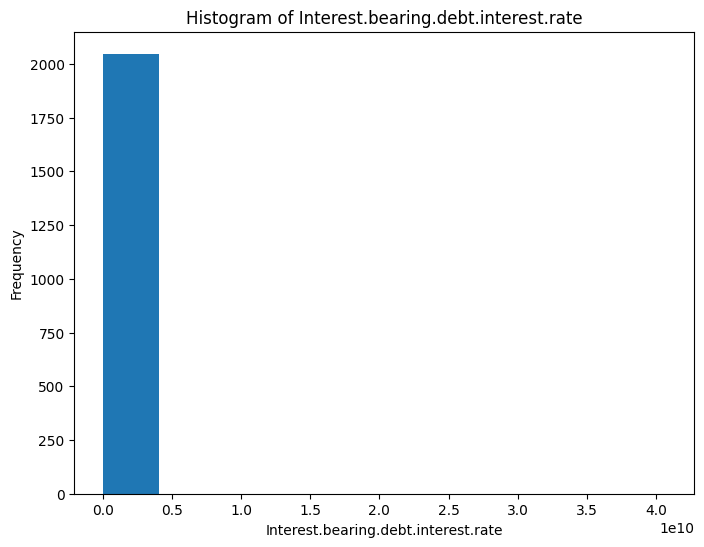

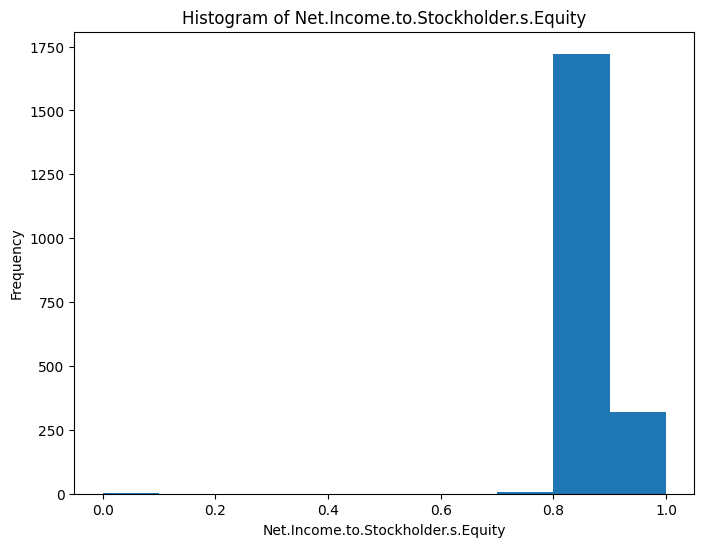

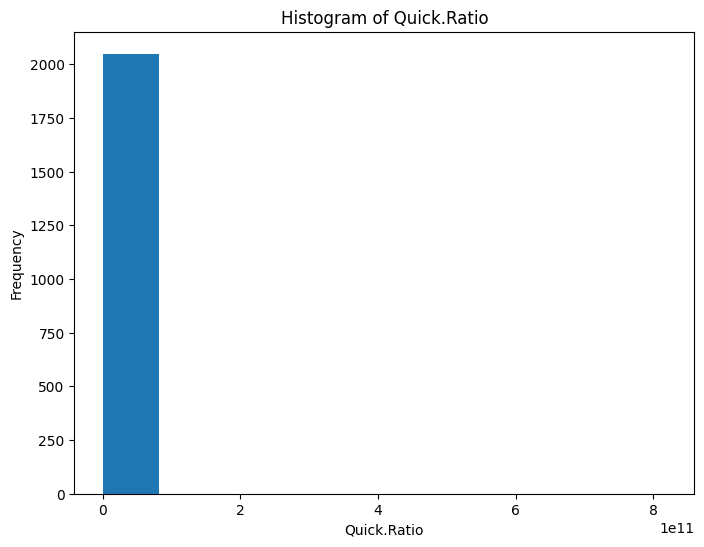

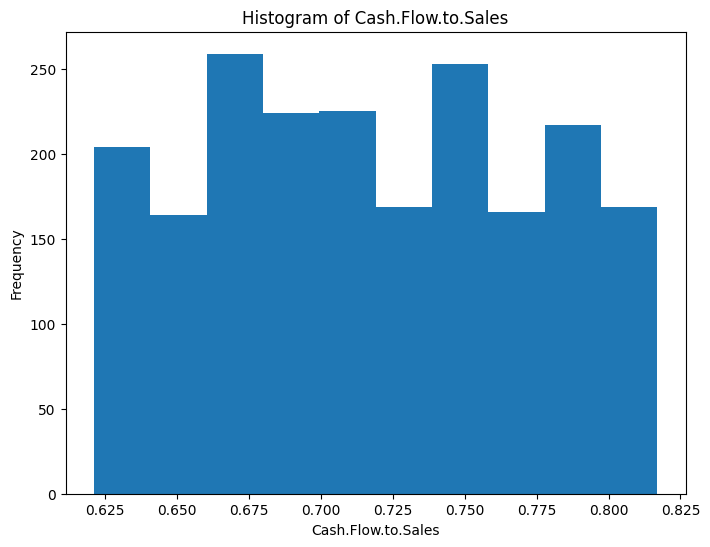

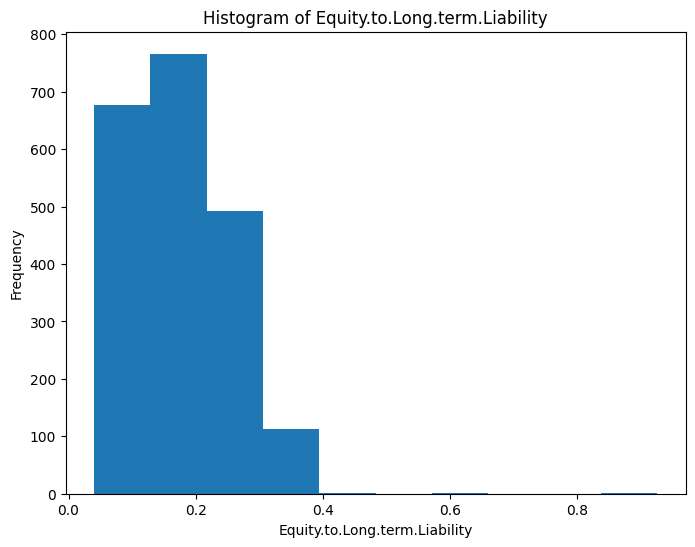

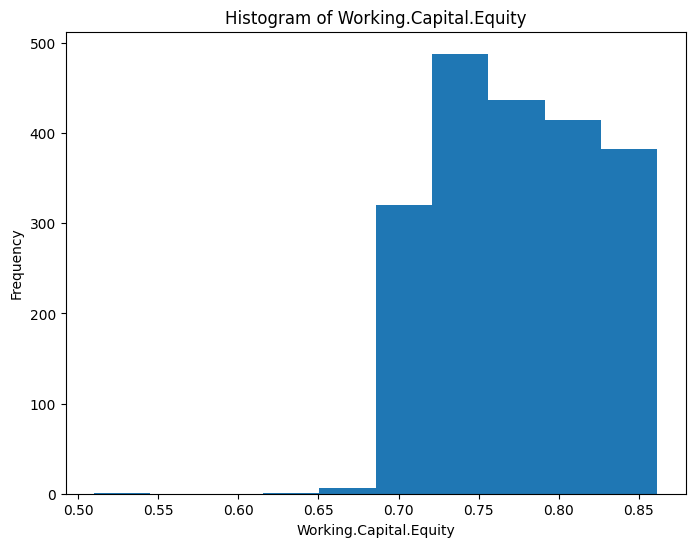

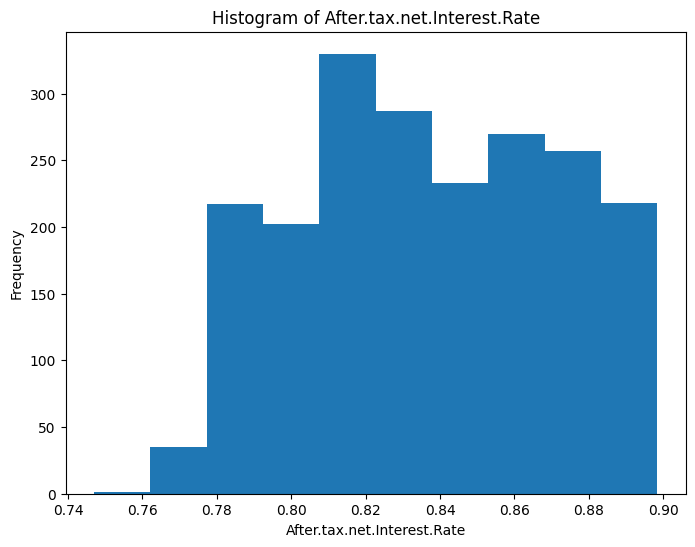

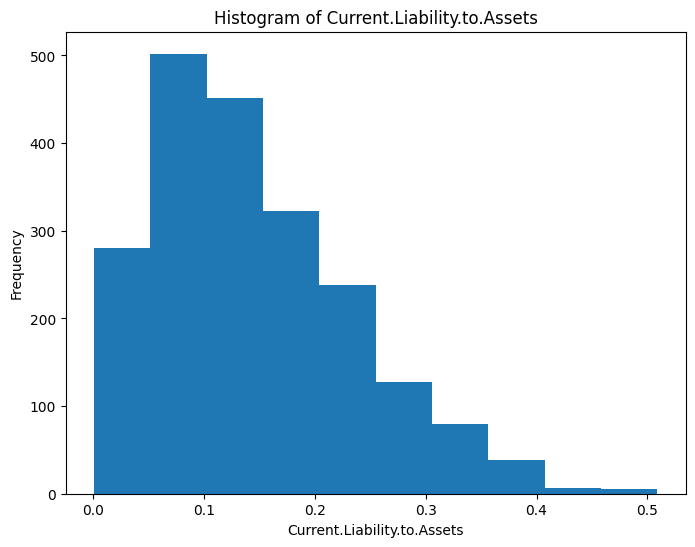

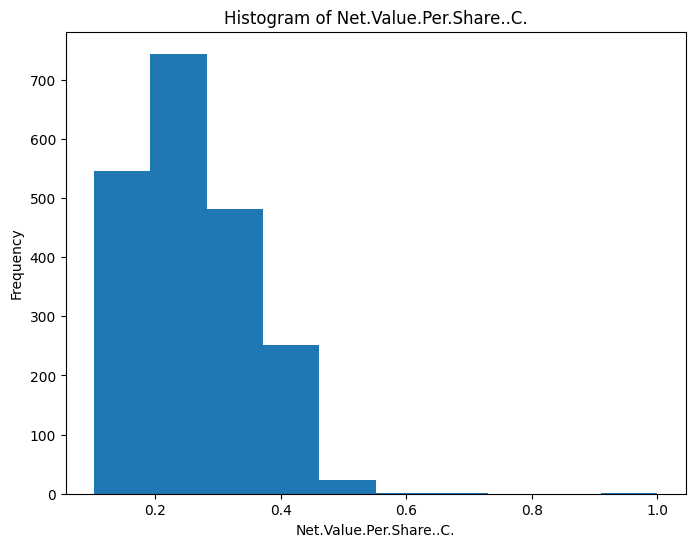

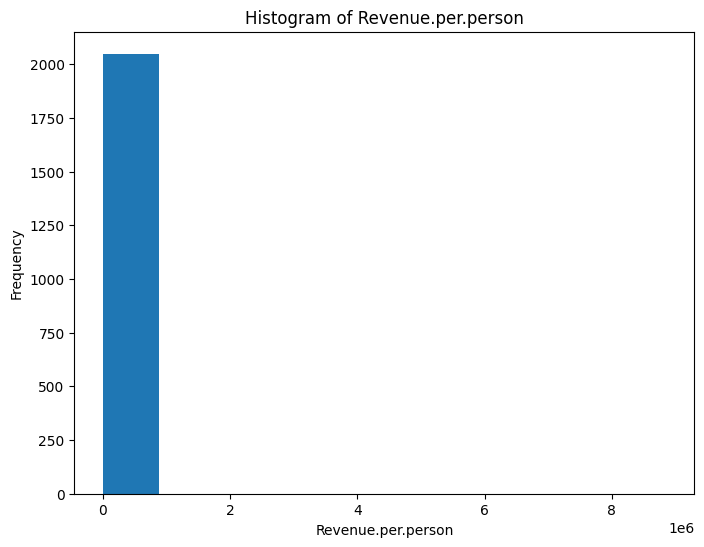

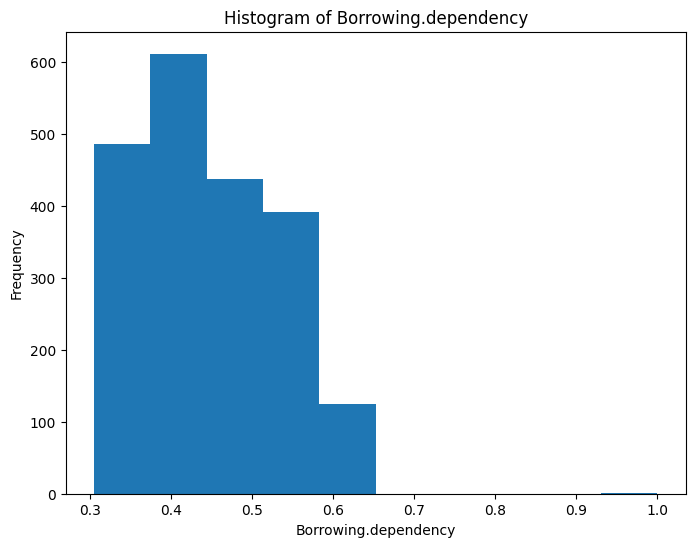

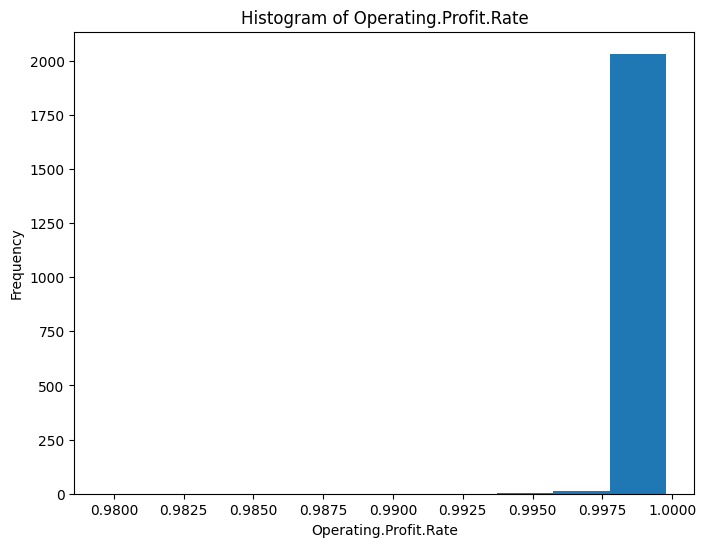

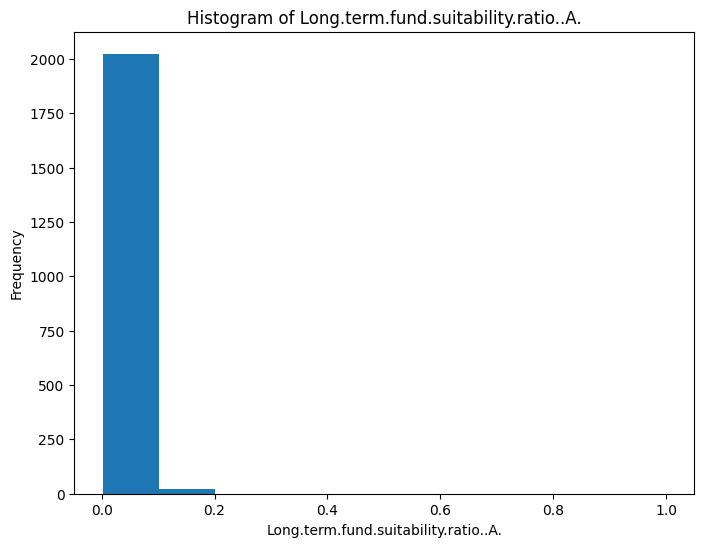

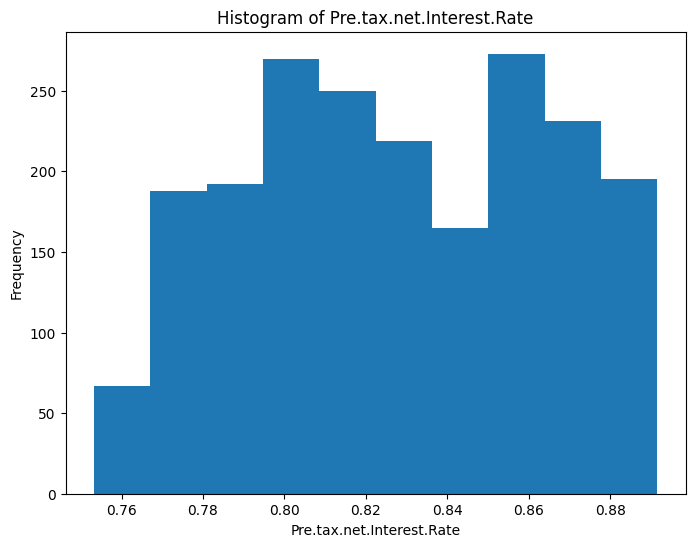

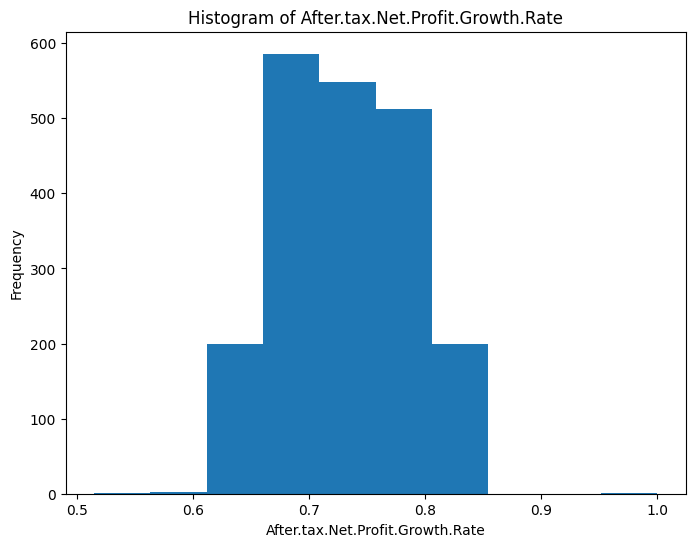

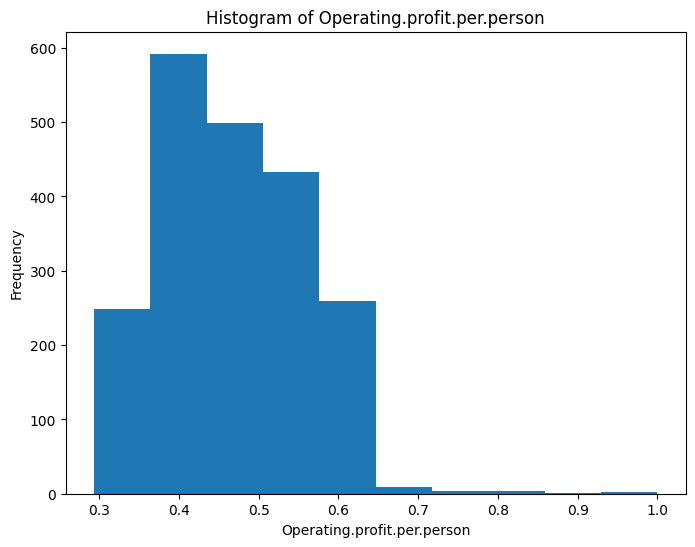

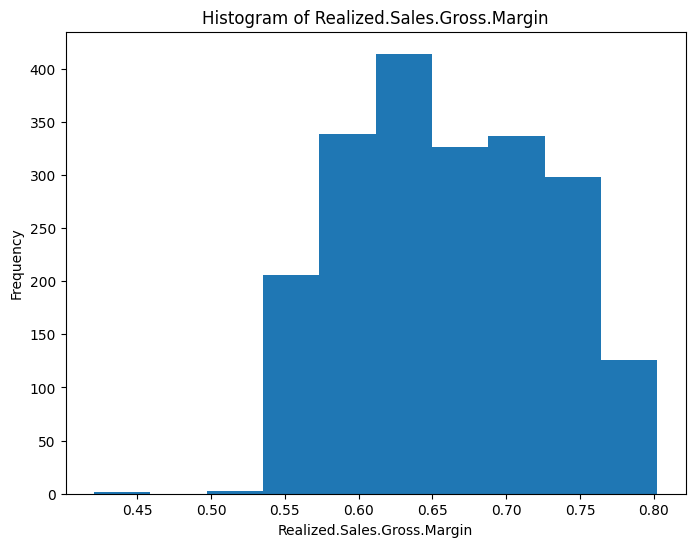

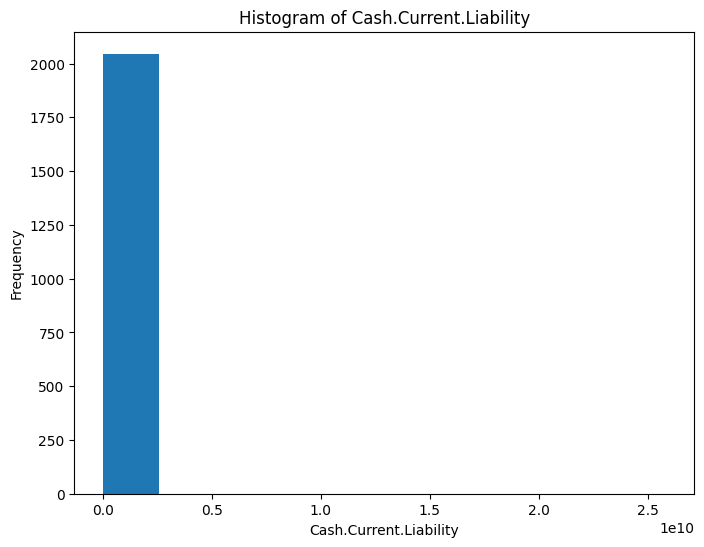

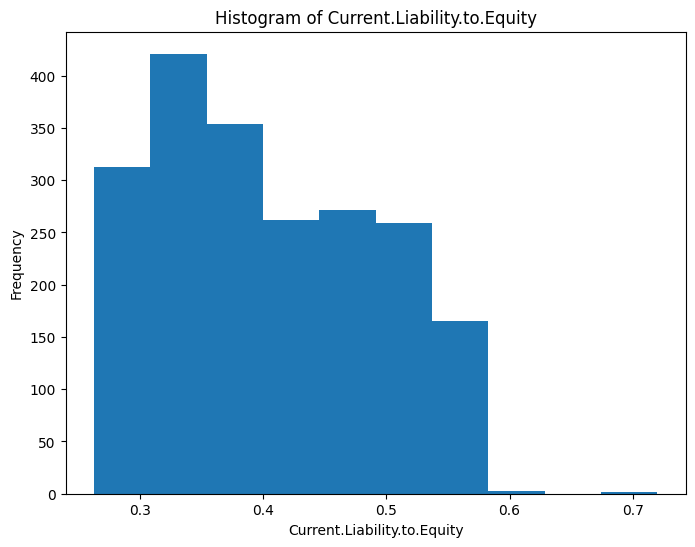

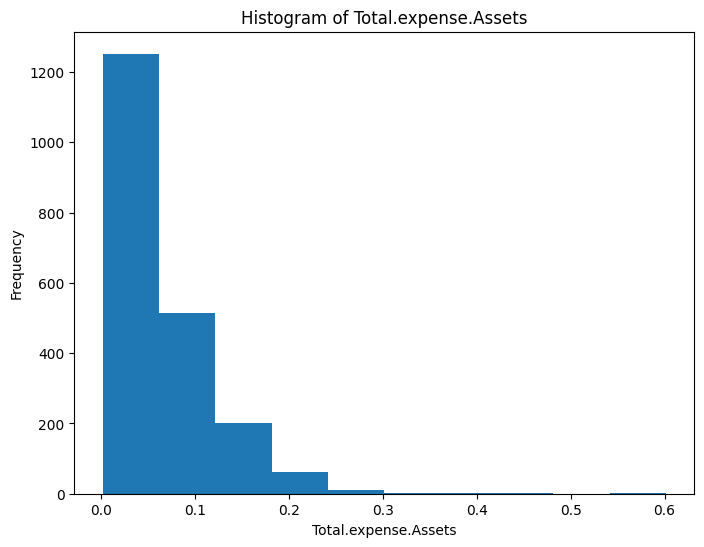

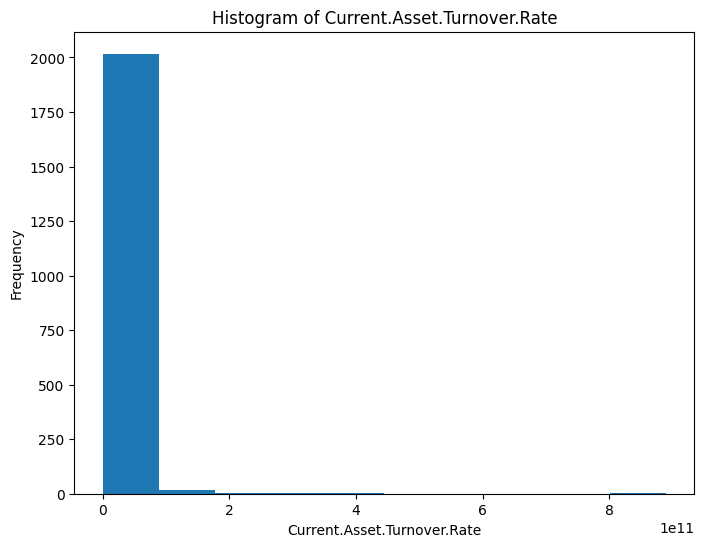

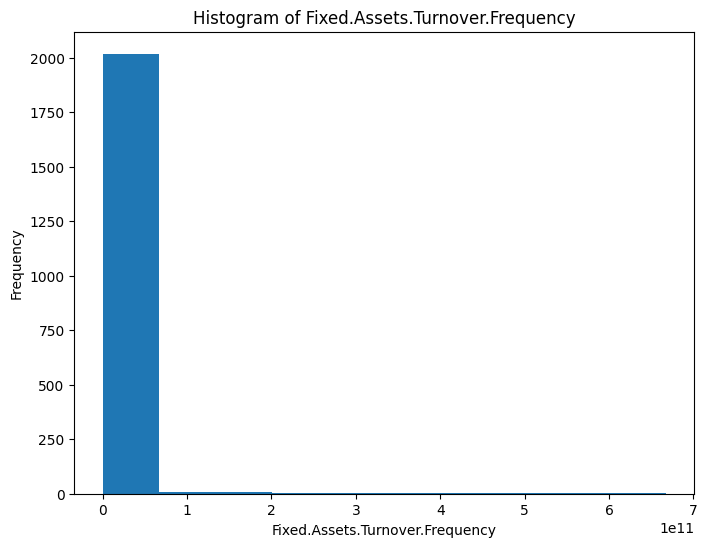

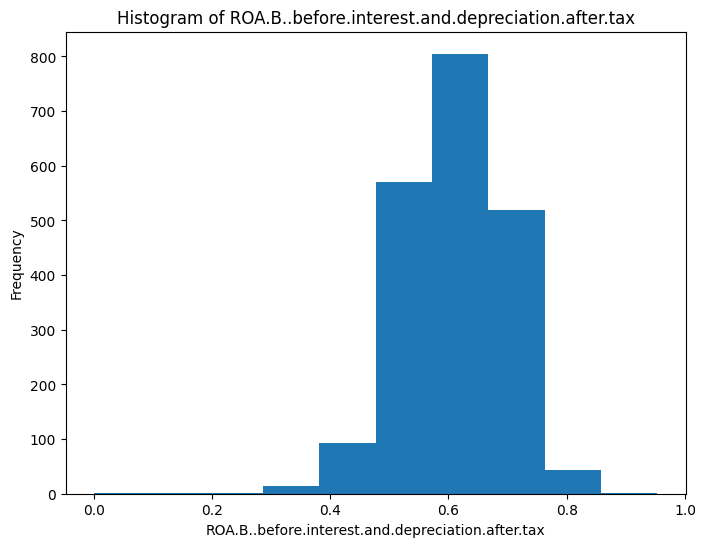

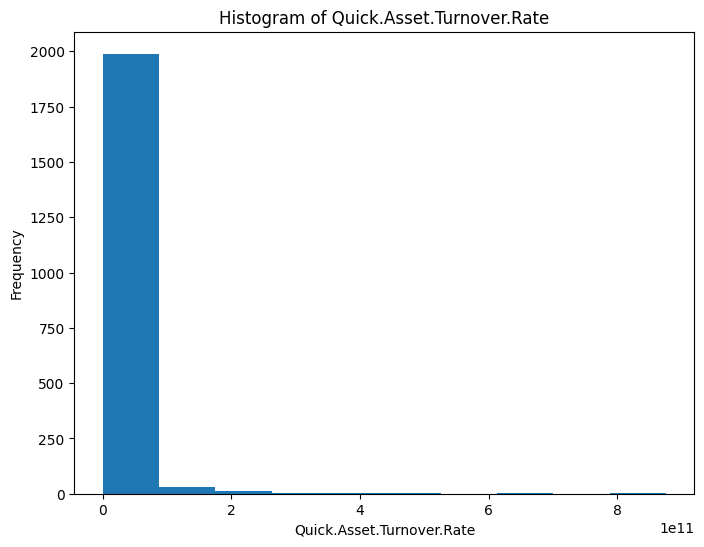

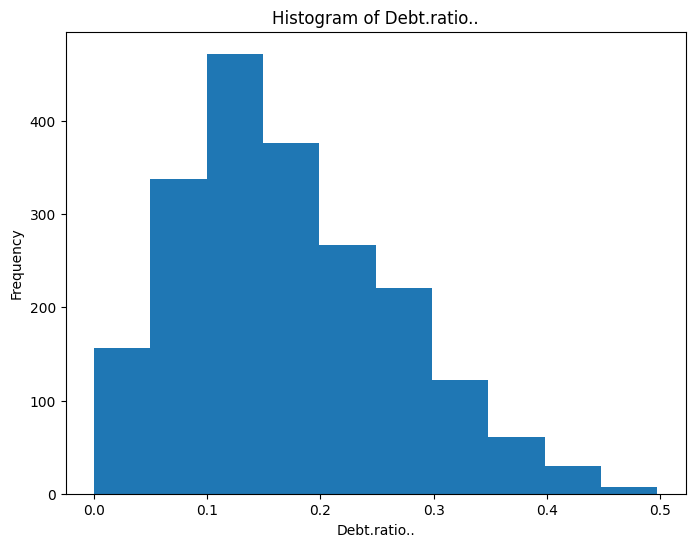

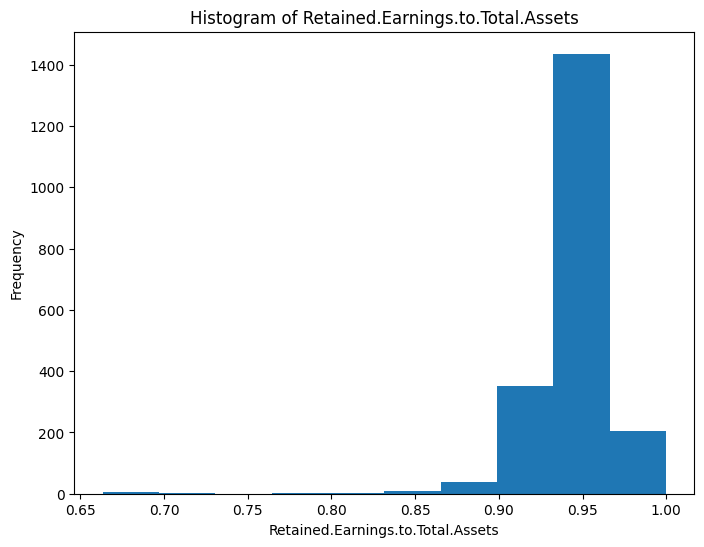

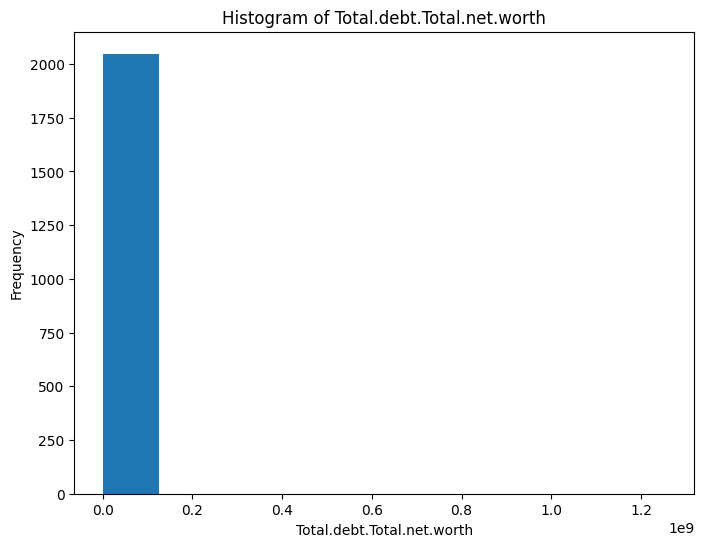

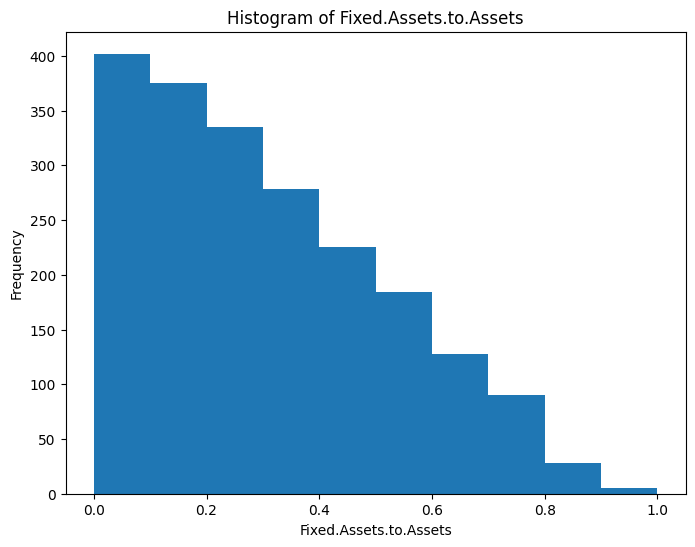

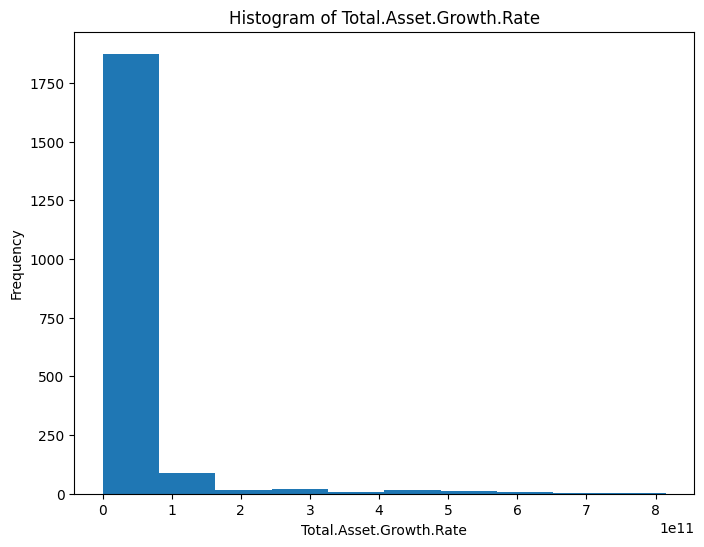

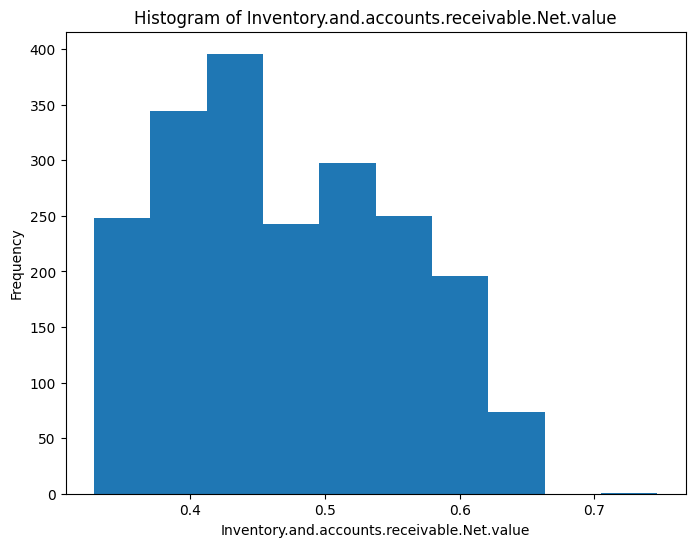

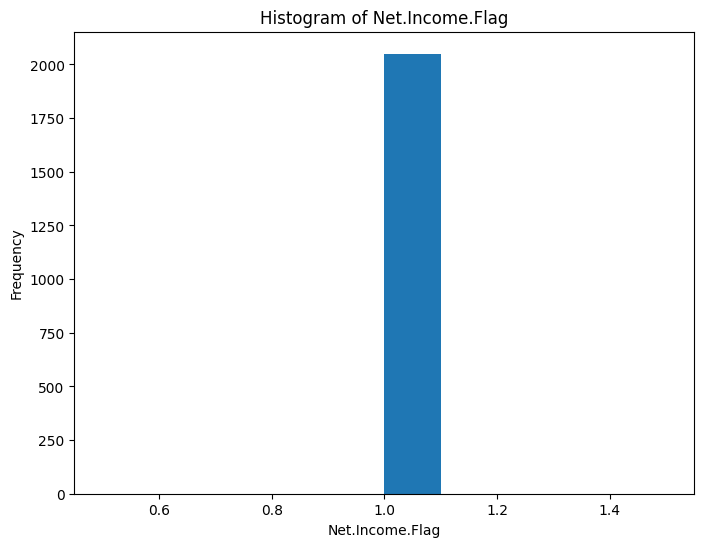

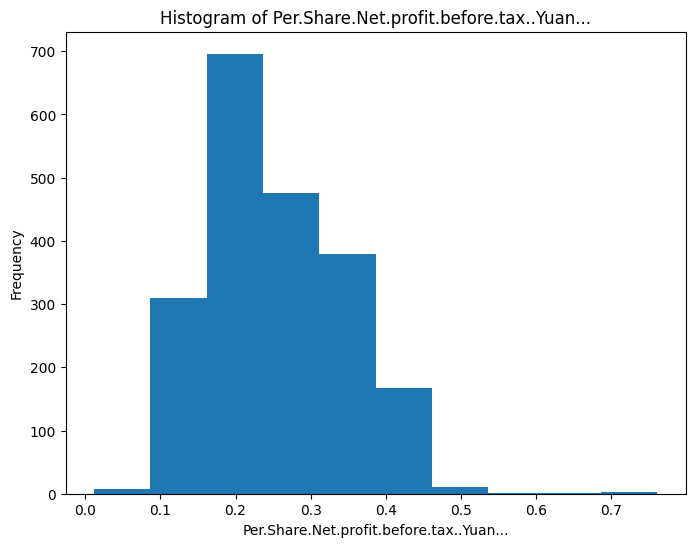

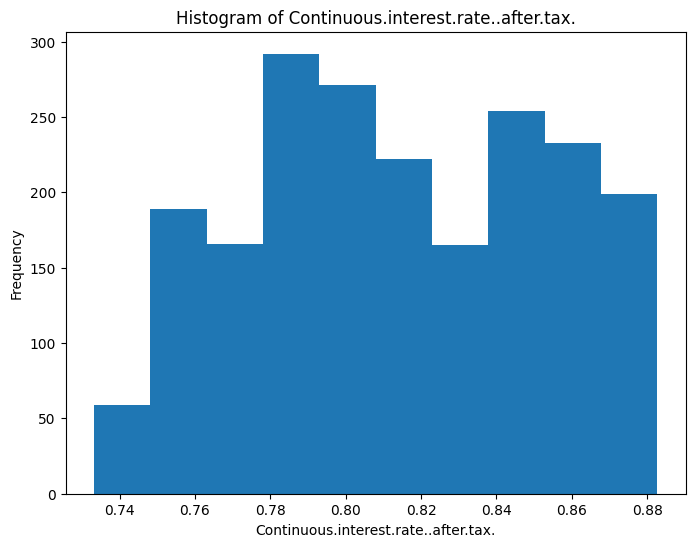

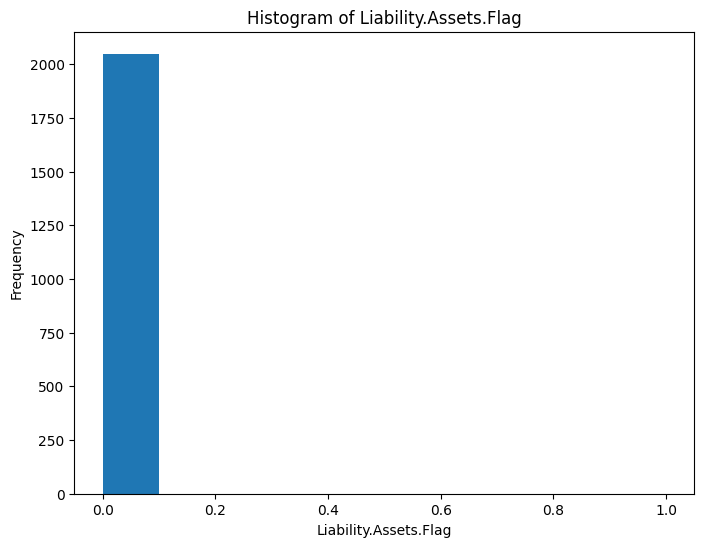

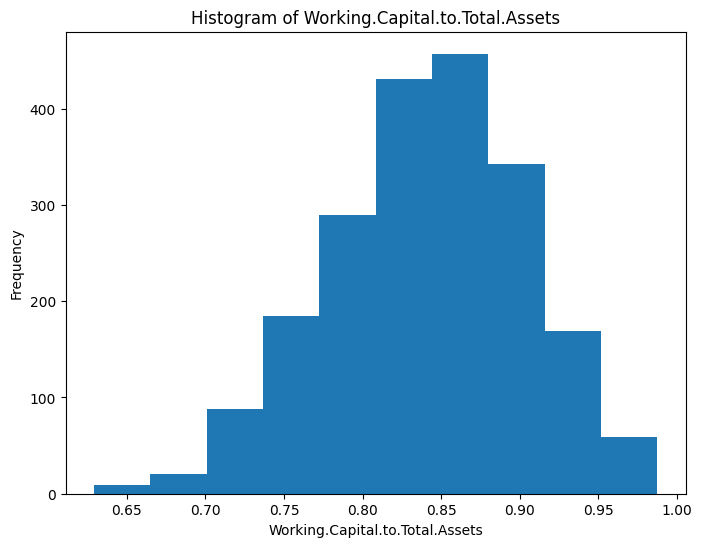

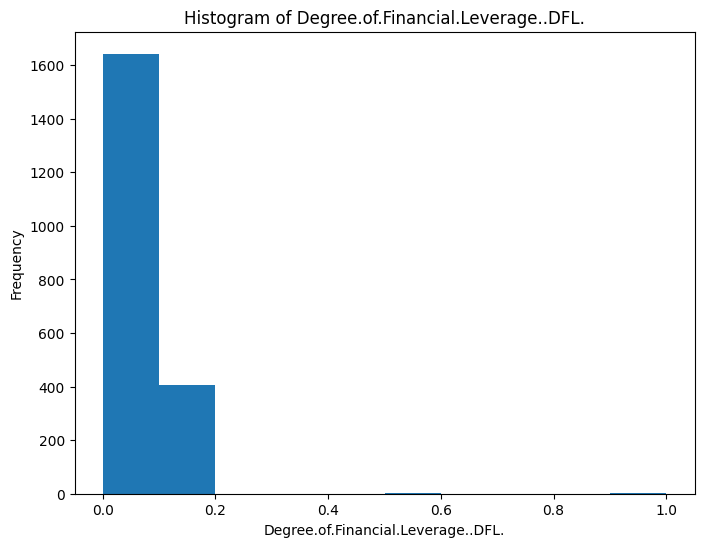

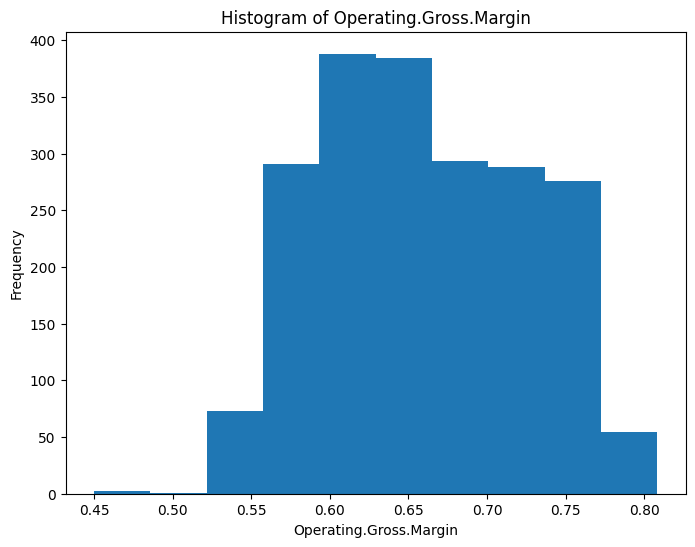

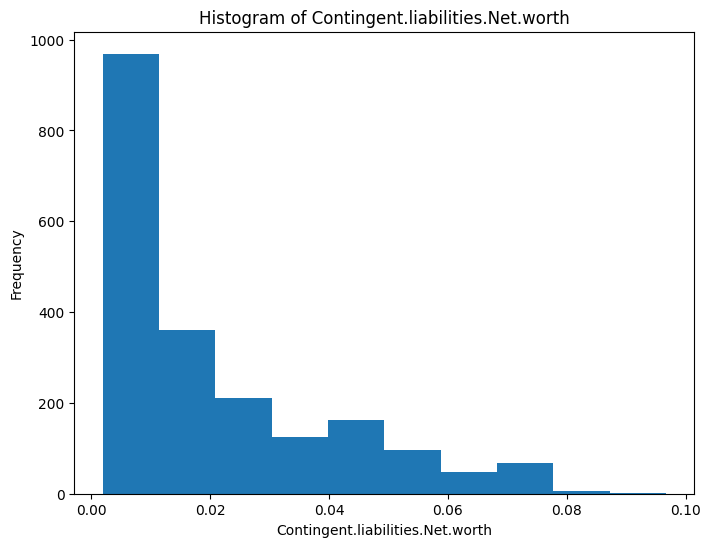

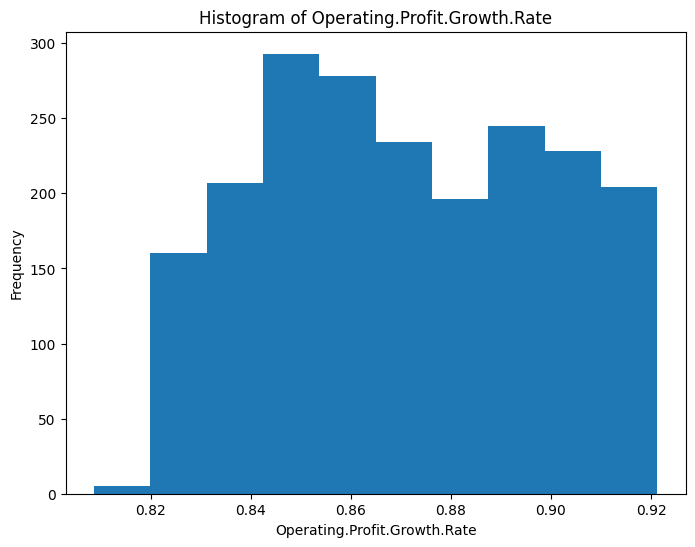

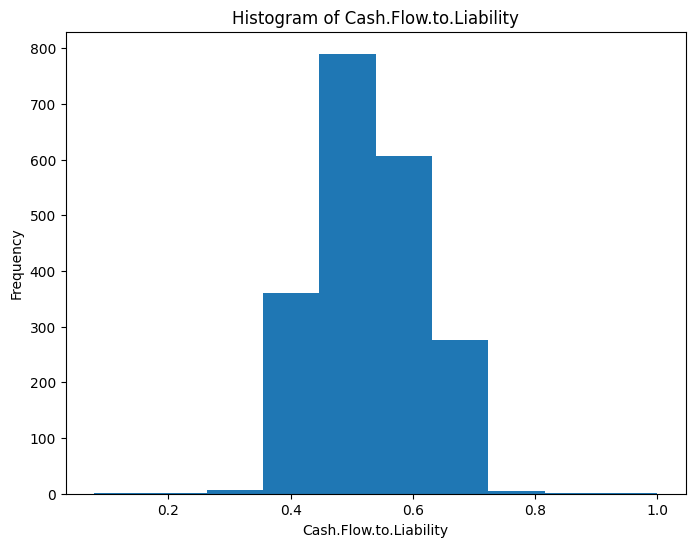

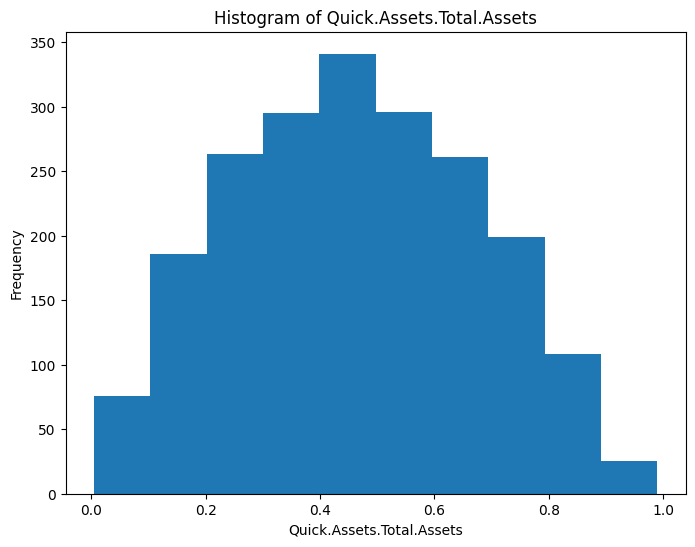

In [ ]:
for column in df_train.columns:
    # Crear los intervalos (bins) y calcular las frecuencias
    hist, bins = np.histogram(df_train[column], bins=10)

    # Crear el gráfico de barras con matplotlib
    plt.figure(figsize=(8, 6))
    plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
# prompt: boxplot de la variables con respeto a la variable bankruptcy

for column in df_train.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Bankrupt?', y=column, data=df_train)
    plt.title(f'Boxplot of {column} vs. Bankruptcy')
    plt.xlabel('Bankruptcy')
    plt.ylabel(column)
    plt.show()


In [ ]:
# Calculate the number of rows and columns for subplots
num_cols = 3
num_rows = math.ceil(len(df_train.columns) / num_cols)


# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through each column and create a histogram
for i, column in enumerate(df_train.columns):
    sns.histplot(df_train[column], kde=True, ax=axes[i])  # Use seaborn's histplot with KDE
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


KeyboardInterrupt: 

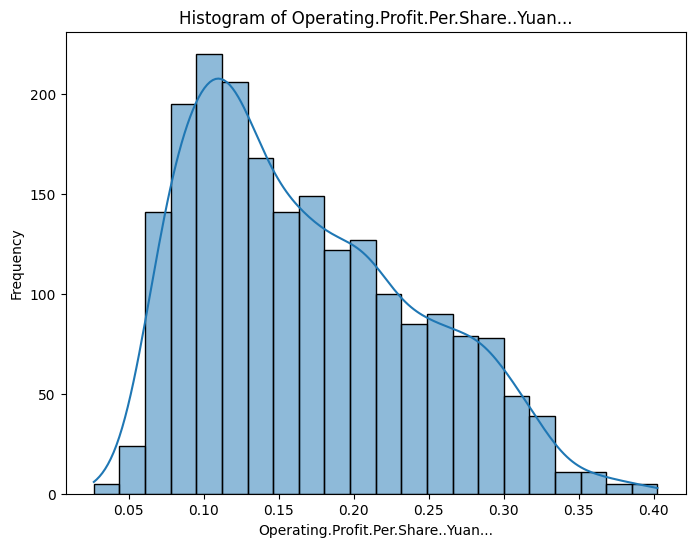

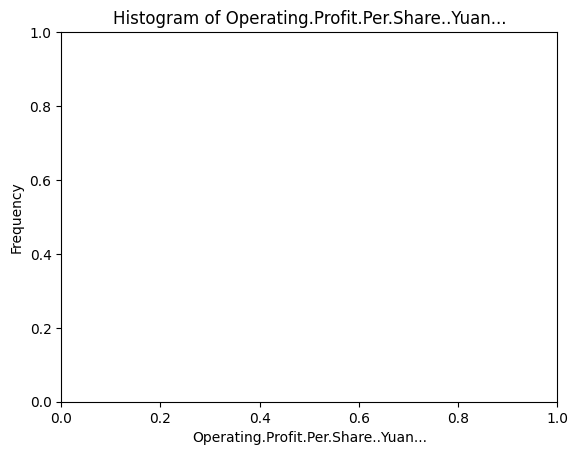

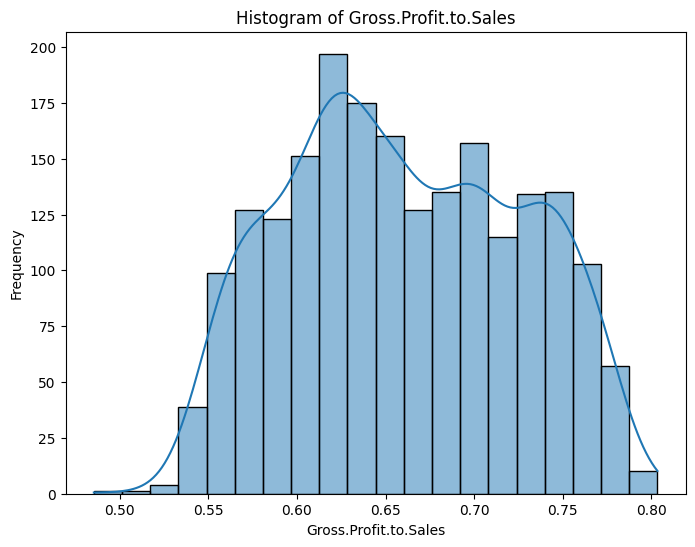

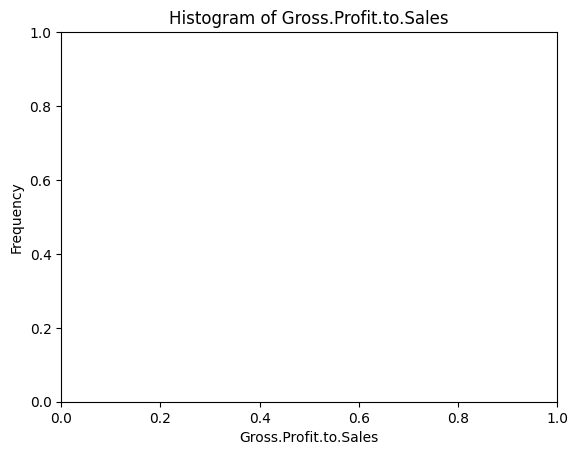

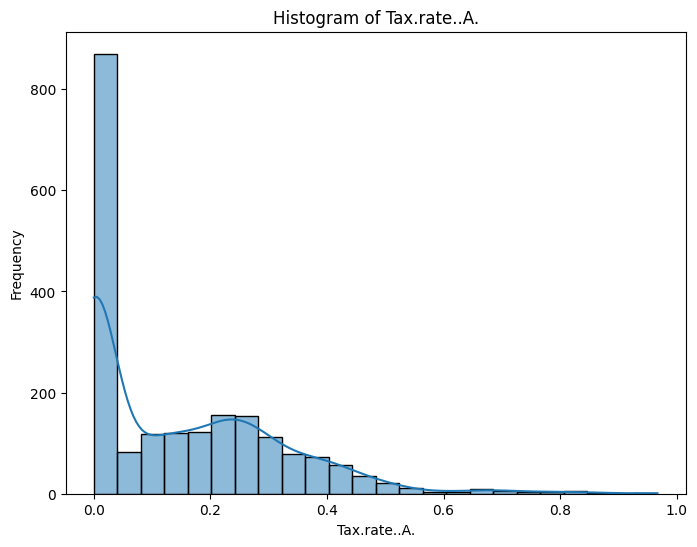

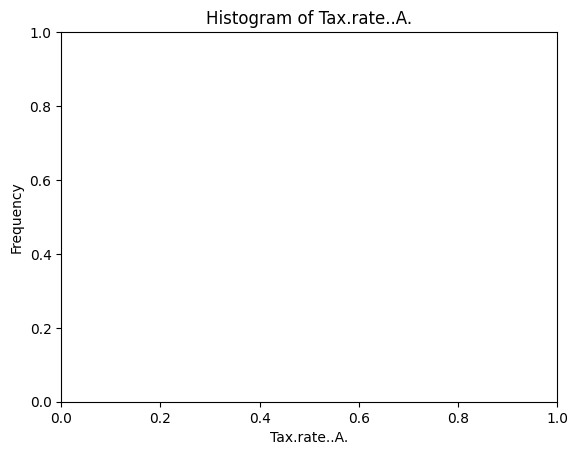

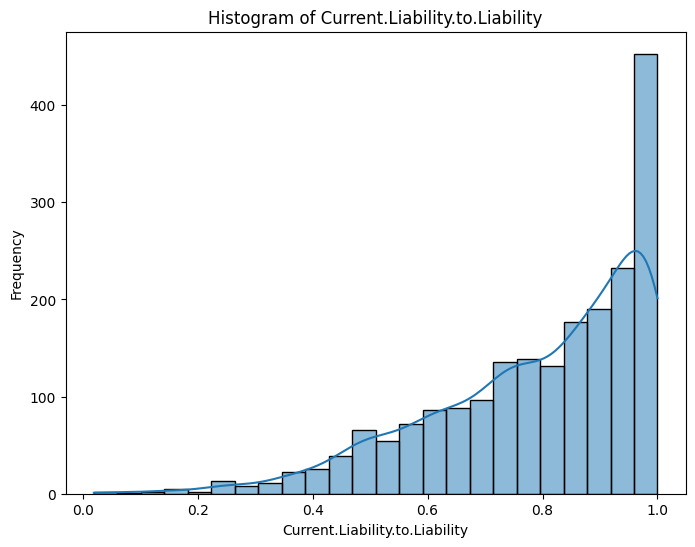

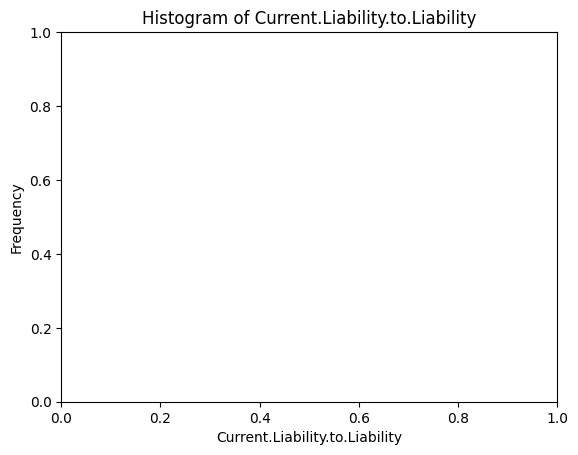

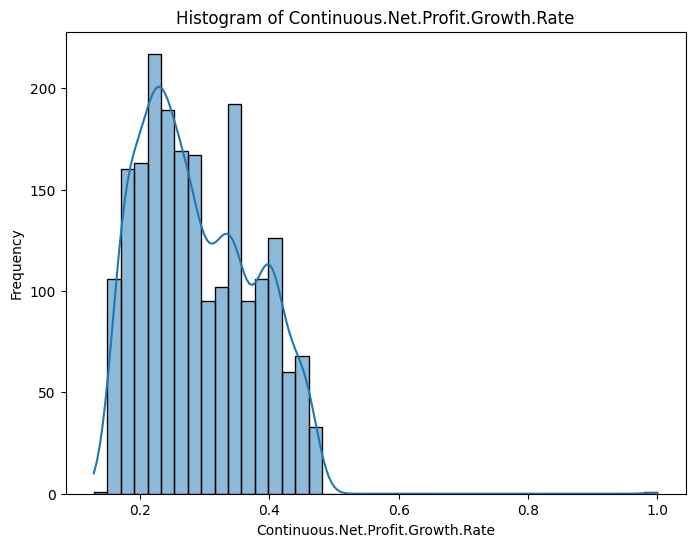

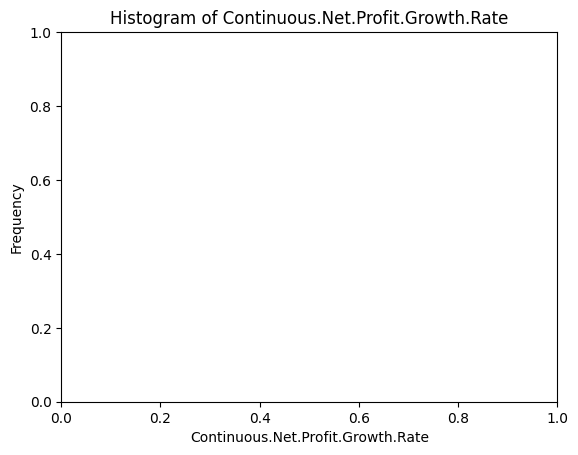

MemoryError: Unable to allocate 136. TiB for an array with shape (18690398407549,) and data type float64

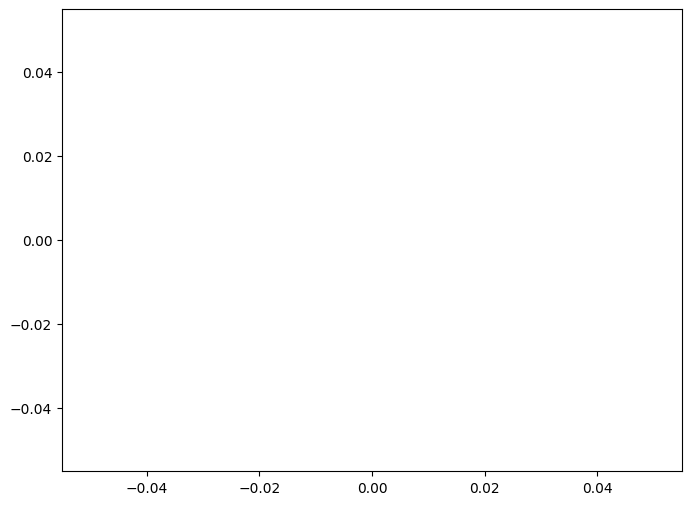

In [ ]:
for column in df_train.columns[3:]:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(df_train[column], kde=True)  # Use seaborn's histplot with KDE
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()